# Introduction (Text Representation / Feature extraction from text / text vectorization)
## Text to Vector Conversion ->

OHE

Bag of Words

Tf-Idf

N-Gram (Bag of N-Grams)

Word2Vec (Embedding)

Custom Features


# 1. OneHot Encoding (OHE)

### Corpus (c) --> Total number of words
### Vocaulary (v) --> Unique words in corpus
### Document (d) --> Each review is Document
### Word (w) --> Each word in document

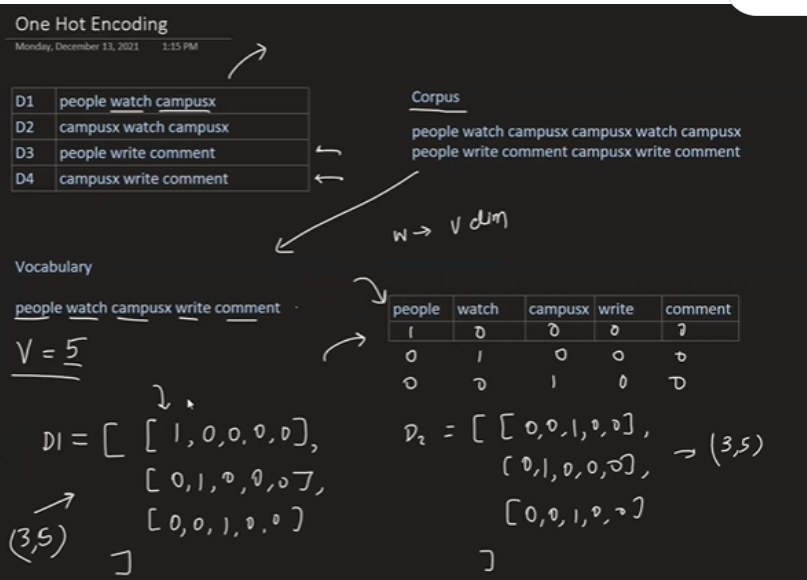

## Pros

easy to intutive

easy to implement

## Cons

sparsity

Overfitting

may be variable input size

Out of vocabulary

No capturing of semantic meaning

# 2. Bag of Words

Used in text classification



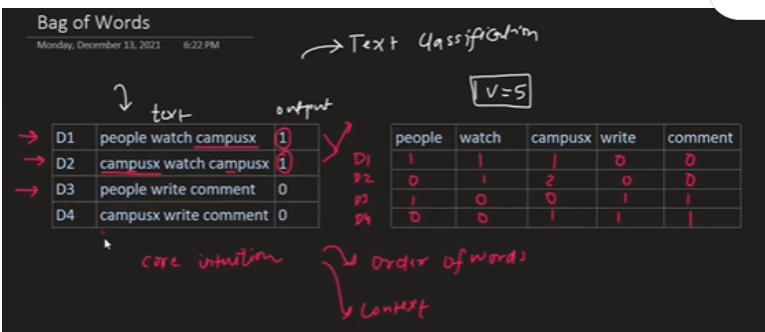

### Pros

simple and intutive

fixed size

little bit capture of semantic meaning

### Cons

sparsity

out of vocabulary

not consider ordering is an issue

negation of any sentence is very close to original sentence

Code Implementation

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.DataFrame({'text':['people watch campusx','campusx watch campusx','people write comment','campusx write comment'],'output':[1,1,0,0]})
df

,text,output
0,people watch campusx,1
1,campusx watch campusx,1
2,people write comment,0
3,campusx write comment,0


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [4]:
bow=cv.fit_transform(df['text'])

In [5]:
print(cv.vocabulary_)

{'people': 2, 'watch': 3, 'campusx': 0, 'write': 4, 'comment': 1}


In [7]:
print(bow[0].toarray())
print(bow[1].toarray())
print(bow[2].toarray())
print(bow[3].toarray())

[[1 0 1 1 0]]
[[2 0 0 1 0]]
[[0 1 1 0 1]]
[[1 1 0 0 1]]


In [9]:
cv.transform(['campusx watch and write comment of campusx']).toarray()

array([[2, 1, 0, 1, 1]], dtype=int64)

# 3. N-Grams

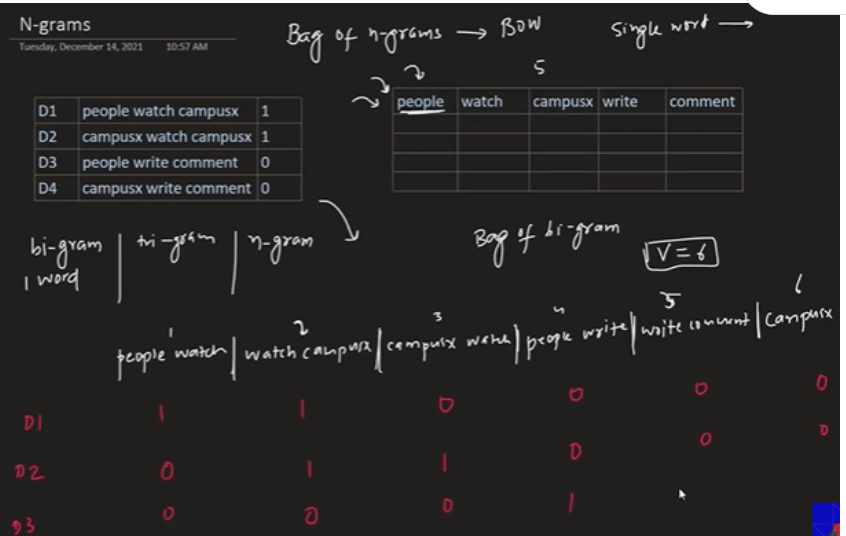

# Pros

vector distance increase

able to capture semantic meaning of sentence

easy to implement

# Cons

dimension of vocabulary increase

slow down the algo

Out of Vocabulary

In [10]:
import pandas as pd
import numpy as np

In [11]:
df=pd.DataFrame({'text':['people watch campusx','campusx watch campusx','people write comment','campusx write comment'],'output':[1,1,0,0]})
df

,text,output
0,people watch campusx,1
1,campusx watch campusx,1
2,people write comment,0
3,campusx write comment,0


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range=(2,2))

In [13]:
bow=cv.fit_transform(df['text'])

In [14]:
print(cv.vocabulary_)

{'people watch': 2, 'watch campusx': 4, 'campusx watch': 0, 'people write': 3, 'write comment': 5, 'campusx write': 1}


In [16]:
print("Total Bi Gram Vocabulary : ", len(cv.vocabulary_))

Total Bi Gram Vocabulary :  6


In [17]:
cv=CountVectorizer(ngram_range=(3,3))


In [18]:
bow=cv.fit_transform(df['text'])

In [19]:
print(cv.vocabulary_)

{'people watch campusx': 2, 'campusx watch campusx': 0, 'people write comment': 3, 'campusx write comment': 1}


In [20]:
print("Total Tri Gram Vocabulary : ", len(cv.vocabulary_))

Total Tri Gram Vocabulary :  4


In [21]:
cv=CountVectorizer(ngram_range=(1,2))


In [22]:
bow=cv.fit_transform(df['text'])

In [23]:
print(cv.vocabulary_)

{'people': 4, 'watch': 7, 'campusx': 0, 'people watch': 5, 'watch campusx': 8, 'campusx watch': 1, 'write': 9, 'comment': 3, 'people write': 6, 'write comment': 10, 'campusx write': 2}


In [24]:
print("Total Uni Gram and Bi Gram Vocabulary : ", len(cv.vocabulary_))

Total Uni Gram and Bi Gram Vocabulary :  11


# 4. Tf-Idf

provide a value of each word such that a particular word has high occurance in particular document but rare in whole corpus. Value is calculate as:

Tf = Term Frequency

Idf = Inverse Document Frequency

Tf X Idf

![Screenshot (381).png](<attachment:Screenshot (381).png>)

## Pros
Used in information retrieval system (eg. search engine)

## Cons

Sparsity

Out of Vocabulary

High dimension (hence overfitting)

Not capture semantic relationship

In [26]:
import pandas as pd
import numpy as np

In [27]:
df=pd.DataFrame({'text':['people watch campusx','campusx watch campusx','people write comment','campusx write comment'],'output':[1,1,0,0]})
df

,text,output
0,people watch campusx,1
1,campusx watch campusx,1
2,people write comment,0
3,campusx write comment,0


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
tfidf.fit_transform(df['text']).toarray()

array([[0.49681612, 0.        , 0.61366674, 0.61366674, 0.        ],
       [0.8508161 , 0.        , 0.        , 0.52546357, 0.        ],
       [0.        , 0.57735027, 0.57735027, 0.        , 0.57735027],
       [0.49681612, 0.61366674, 0.        , 0.        , 0.61366674]])

In [29]:
print(tfidf.idf_)
print(tfidf.get_feature_names_out())

[1.22314355 1.51082562 1.51082562 1.51082562 1.51082562]
['campusx' 'comment' 'people' 'watch' 'write']


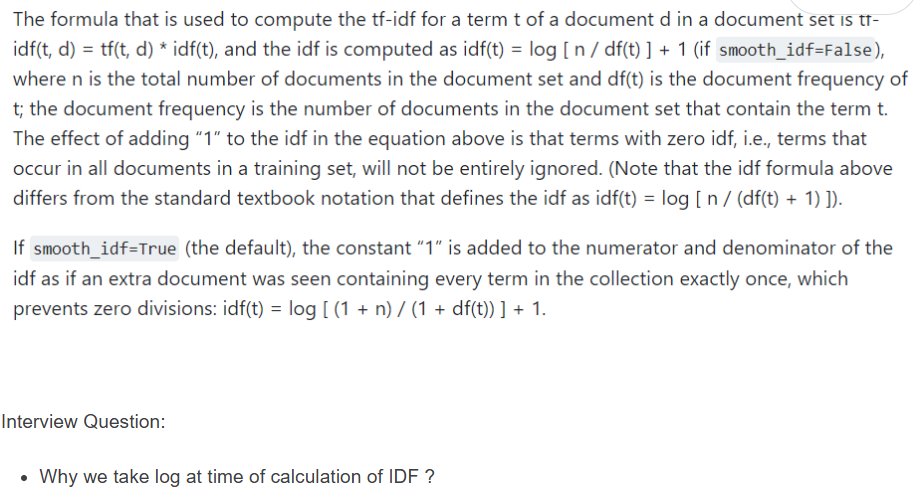